## Task 5: 4) Implementation of PageRank Algorithm

### Biomedical Dataset: Human protein-protein interaction network (nodes are gene Entrez IDs)
Source: http://snap.stanford.edu/pathways/

In [23]:
import networkx as nx
import json

graph = nx.DiGraph()
g_in = {}
g_out = {}
g_inout = {}
degrees = {'in': 0, 'out': 0, 'inout': 0}
alpha=0.85

file = open('bio-pathways-network.csv', 'r')
for row in file.readlines()[1:500]:
    node1, node2 = row.strip().split(",")
    if node1 != node2:
        graph.add_edge(node1, node2)
file.close()

for node in graph.nodes():
    g_in[node] = graph.in_degree(node)
    g_out[node] = graph.out_degree(node)
    g_inout[node] = graph.degree(node)

    degrees['in'] += g_in[node]
    degrees['out'] += g_out[node]
    degrees['inout'] += g_inout[node]



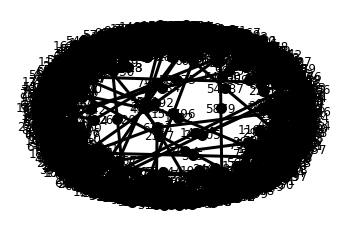

In [24]:
import matplotlib.pyplot as plt
subax1 = plt.subplot()
options = {'node_color': 'black','node_size': 100, 'width': 3,}
nx.draw(graph, **options, with_labels=True)
plt.savefig("og_data.png")

### Basic PageRank algorithm
Source: https://networkx.guide/algorithms/link-analysis/pagerank/
alpha = 0.85, due to Page et al. 99 (doi:10.1016/S0169-7552(98)00110-X)

In [59]:

import networkx as nx
import json

graph = nx.DiGraph()
g_in = {}
g_out = {}
g_inout = {}
degrees = {'in': 0, 'out': 0, 'inout': 0}
alpha=0.85

file = open('bio-pathways-network.csv', 'r')
for row in file.readlines():
    node1, node2 = row.strip().split(",")
    if node1 != node2:
        graph.add_edge(node1, node2)
file.close()

for node in graph.nodes():
    g_in[node] = graph.in_degree(node)
    g_out[node] = graph.out_degree(node)
    g_inout[node] = graph.degree(node)

pr = nx.pagerank(graph, alpha=0.85)
pr_list=pr.items()

output=open('BasicPageRank.csv','w')
output.write("Node\tPR\tDegree\tIn-degree\tOut-degree\n")
for item in pr_list:
    output.write(str(item[0])+"\t{:0.12f}".format(item[1])
                    + "\t" + str(graph.degree(item[0]))
                    + "\t" + str(graph.in_degree(item[0]))
                    + "\t" + str(graph.out_degree(item[0]))
                    +"\n")
output.close()


### Topic Specific algorithm: PageRank-Based Method for Protein Target Identification
Literature Source: https://doi.org/10.1371/journal.pone.0054204
Code Source: http://uratim.com/rPPR
alpha = 0.85, due to Page et al. 99 (doi:10.1016/S0169-7552(98)00110-X)

In [60]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-

import sys
import networkx as nx
import argparse




def restricted_float(x):
    x = float(x)
    if x <= 0.0 or x >= 1.0:
        raise argparse.ArgumentTypeError("%r not in range [0.0, 1.0]" % (x,))
    return x

'''
parser = argparse.ArgumentParser(description='This script calculates PageRank.')
parser.add_argument('input', type=argparse.FileType('r'), default=sys.stdin, help='tab separated edge file')
parser.add_argument('output', type=argparse.FileType('w'),  default=sys.stdout, help='output file')
parser.add_argument('-a', '--alpha', metavar="ALPHA", type=restricted_float, default=0.0, help='alpha value for PageRank')
args = parser.parse_args()
'''

graph = nx.DiGraph()
pers_in = {}
pers_out = {}
pers_inout = {}
degrees = {'in': 0, 'out': 0, 'inout': 0}
alpha=0.85

file = open('bio-pathways-network.csv', 'r')
for row in file.readlines():
    node1, node2 = row.strip().split(",")
    if node1 != node2:
        graph.add_edge(node1, node2)
file.close()

for node in graph.nodes():
    pers_in[node] = graph.in_degree(node)
    pers_out[node] = graph.out_degree(node)
    pers_inout[node] = graph.degree(node)

    degrees['in'] += pers_in[node]
    degrees['out'] += pers_out[node]
    degrees['inout'] += pers_inout[node]

ppr = nx.algorithms.link_analysis.pagerank_alg.pagerank(graph, alpha=alpha)
ppr_in = nx.algorithms.link_analysis.pagerank_alg.pagerank(graph, alpha=alpha, personalization=pers_in)
ppr_out = nx.algorithms.link_analysis.pagerank_alg.pagerank(graph, alpha=alpha, personalization=pers_out)
ppr_inout = nx.algorithms.link_analysis.pagerank_alg.pagerank(graph, alpha=alpha, personalization=pers_inout)

output=open('TopicSpecPageRank.csv','w')

output.write("Node\tPR\tPPR InOut\tPPR In\tPPR Out\tDegree\tIn-degree\tOut-degree\tPPR in/in-degree\tAlpha: " + str(alpha) + "\n")


for node in sorted(ppr, key=lambda x: ppr[x], reverse=True):
    try:
        rPPR=str(ppr_in[node]/graph.in_degree(node))
    except ZeroDivisionError:
        rPPR='NaN'
    output.write(node + "\t{:0.12f}".format(ppr[node])
                           + "\t{:0.12f}".format(ppr_inout[node])
                           + "\t{:0.12f}".format(ppr_in[node])
                           + "\t{:0.12f}".format(ppr_out[node])
                           + "\t" + str(graph.degree(node))
                           + "\t" + str(graph.in_degree(node))
                           + "\t" + str(graph.out_degree(node))
                           + "\t" + rPPR
                           + "\n")
output.close()